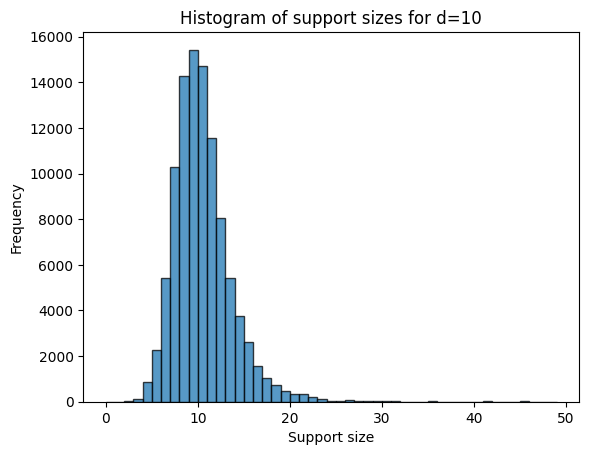

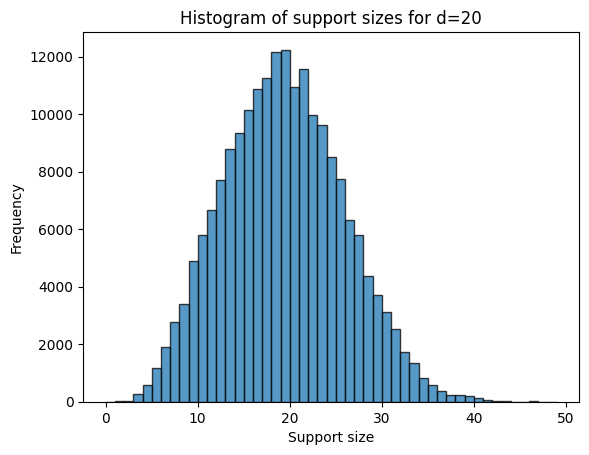

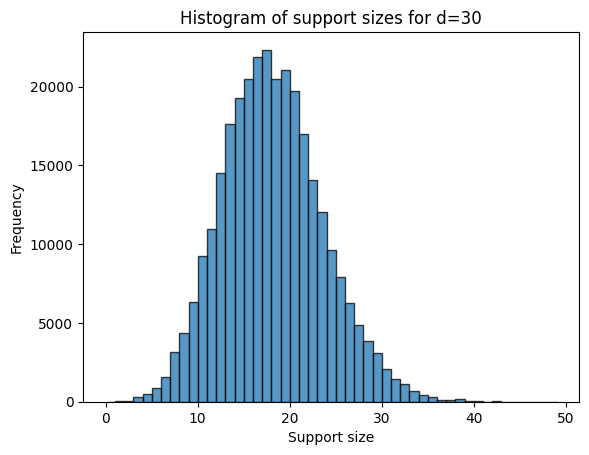

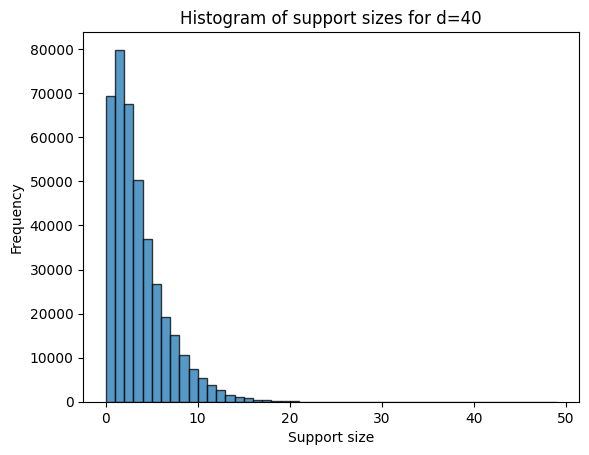

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
dimensions = [10, 20, 30, 40]

def plot_historgam(support_size, d, max_size=50):
    # plot a histogram of the support with border
    plt.hist(support_size, bins=range(0, max_size, 1), alpha=0.75, edgecolor='black')
    plt.title('Histogram of support sizes for d={}'.format(d))
    plt.xlabel('Support size')
    plt.ylabel('Frequency')
    plt.show()


for d in dimensions:
    support_size = np.load('/home/local/ASUAD/ywan1053/basis/support_sizes_d_{}.npy'.format(d))
    # plot a histogram of the support sizes
    plot_historgam(support_size, d)




100%|██████████| 10000/10000 [00:00<00:00, 18056.89it/s]


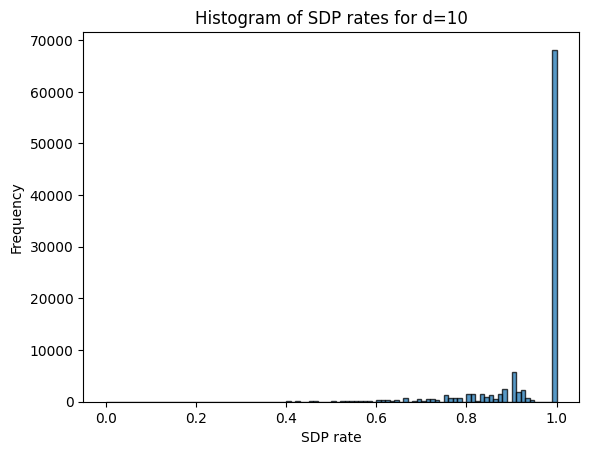

100%|██████████| 20000/20000 [00:03<00:00, 5886.61it/s]


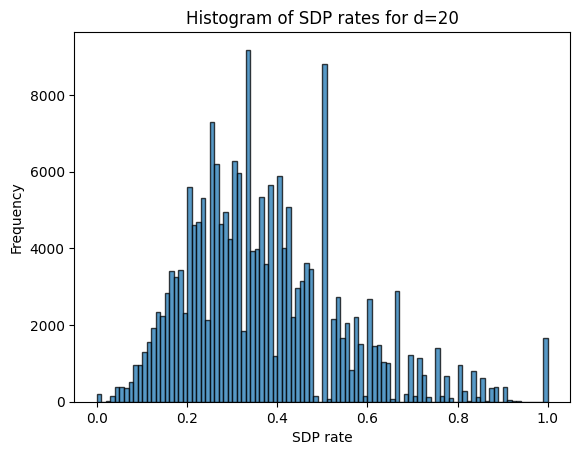

100%|██████████| 30000/30000 [00:07<00:00, 3973.07it/s]


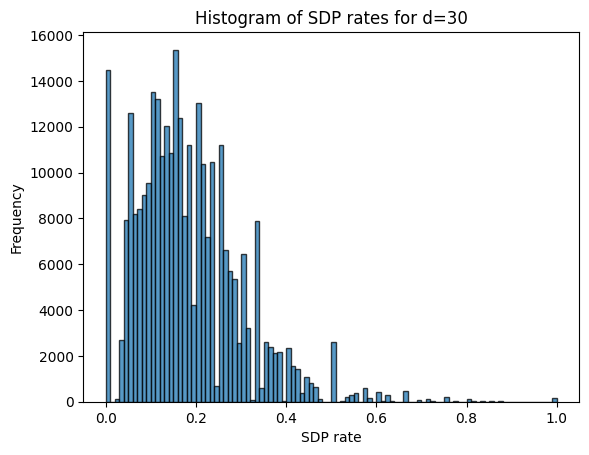

100%|██████████| 40000/40000 [00:05<00:00, 6795.17it/s]


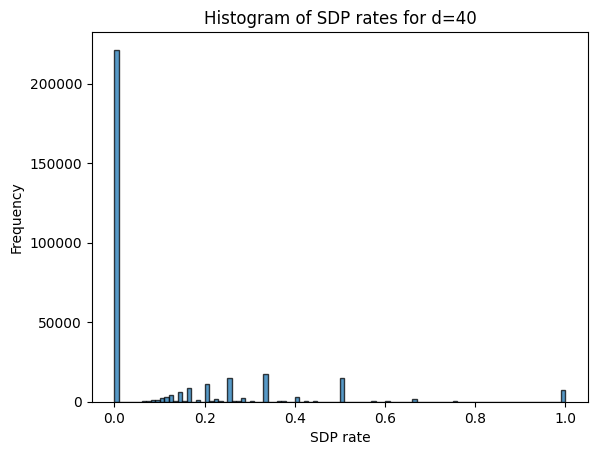

In [17]:
def calculate_sdp_rate(all_betas, d, rho,  threshold=1e-3):

    Nl = rho * d
    N = all_betas.shape[0]
    sdp_rates = []

    for i in tqdm(range(N)):
        # Find support of beta_i
        beta_i = all_betas[i]
        # insert 0 at i-th position, that's a new element, thus the size of beta_i is increased by 1
        beta_i = np.insert(beta_i, i, 0)
        support = np.where(np.abs(beta_i) > threshold)[0]
        # Determine which subspace X_i belongs to
        subspace_idx = i // Nl

        # Get indices of all points in the same subspace as X_i
        subspace_indices = list(range(subspace_idx * Nl, (subspace_idx + 1) * Nl))

        # Calculate Ci (intersection of support and same subspace points)
        Ci = [j for j in support if j in subspace_indices]
        # Calculate SDP rate for X_i
        if len(support) > 0:
            sdp_rate = len(Ci) / len(support)
            sdp_rates.append(sdp_rate)
    return np.array(sdp_rates)

rho = 10

# def a function plotting the histogram of sdp rates
def plot_sdp_rate_hist(sdp_rates, d):
    # 100 bins from 0 to 1
    bins = np.linspace(0, 1, 101)  # 101 edges will create 100 bins
    plt.hist(sdp_rates, bins=bins, alpha=0.75, edgecolor='black')
    plt.title('Histogram of SDP rates for d={}'.format(d))
    plt.xlabel('SDP rate')
    plt.ylabel('Frequency')
    plt.show()

for d in dimensions:
    all_beta = np.load('/home/local/ASUAD/ywan1053/basis/all_beta_d_{}.npy'.format(d))
    # plot a histogram of the support sizes
    sdp_rates = calculate_sdp_rate(all_beta, d, rho, threshold=1e-3)
    plot_sdp_rate_hist(sdp_rates, d)
